Send **Chris Yu** a message once you are able to alter a cube to change in size 

------------------------------------------------------------------------------------------------------------------------------

# Mass customization ▲
**How:** Programatically changing stl files while allowing them to remain 3D printable <br>
**Goal:** `Programmatically change a cube to a rectangle of variable width based on inputs`

- 
- https://github.com/SolidCode/SolidPython
- https://makerhacks.com/modify-stl-cad-files-for-cnc-or-3d-print-using-python-programming/

numpy-stl -- seems helpful
- https://pypi.org/project/numpy-stl/
- https://github.com/WoLpH/numpy-stl
- https://numpy-stl.readthedocs.io/

Download sample stl files here:
- http://www.ozeki.hu/p_1116-sample-stl-files-you-can-use-for-testing.html
- https://www.makerbot.com/stories/design/design-series-bike-saddle/?type=download-pro

Potential Issues:
- https://www.3dhubs.com/knowledge-base/fixing-most-common-stl-file-errors/#what

------------------------------------------------------------------------------------------------------------------------------

## How

### ⚠️Note: Before doing any of this logic, make sure you can change and save a modified object ⚠️

input parameters -> `Function` -> output/save an adjusted .stl file

**3 Parts:**
1. Change the stl file in 2 ways: (1) Can manually change it and then fit the changes (2) Must figure out which parts to change/ How to access it
2. Make sure units are changed correctly 
3. saving stl file can be done from this

------------------------------------------------------------------------------------------------------------------------------

## Exploratory

In [1]:
# setup 
# !pip install numpy-stl

In [2]:
# imports
from stl import mesh
import math
import numpy
from mpl_toolkits import mplot3d
from matplotlib import pyplot

In [3]:
cube_mesh_file_path = 'Cube_3d_printing_sample.stl'
bunny_mesh_file_path = 'Stanford_Bunny_sample.stl'
tower_mesh_file_path = 'Eiffel_tower_sample.stl'
# saddle_file_path = 'Sample-Saddle.stl'
# saddle_2_file_path = 'Sample-Saddle-2.stl'

In [4]:
# Using an existing stl file:
your_mesh = mesh.Mesh.from_file(cube_mesh_file_path)

------------

## Creating and saving a new stl file


In [5]:

# # Or creating a new mesh (make sure not to overwrite the `mesh` import by
# # naming it `mesh`):
# VERTICE_COUNT = 100
# data = numpy.zeros(VERTICE_COUNT, dtype=mesh.Mesh.dtype)
# your_mesh = mesh.Mesh(data, remove_empty_areas=False)

# # The mesh normals (calculated automatically)
# your_mesh.normals

# # The mesh vectors
# your_mesh.v0, your_mesh.v1, your_mesh.v2
# # Accessing individual points (concatenation of v0, v1 and v2 in triplets)
# assert (your_mesh.points[0][0:3] == your_mesh.v0[0]).all()
# assert (your_mesh.points[0][3:6] == your_mesh.v1[0]).all()
# assert (your_mesh.points[0][6:9] == your_mesh.v2[0]).all()
# assert (your_mesh.points[1][0:3] == your_mesh.v0[1]).all()

# your_mesh.save('new_stl_file.stl')

------------------------------------------------------------------------------------------------------------------------------

## Plotting using matplotlib 

In [6]:
def plot_mesh_from_path(your_file_path):
    # Create a new plot
    figure = pyplot.figure()
    axes = mplot3d.Axes3D(figure)

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file(your_file_path) # change stl here
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

    # Auto scale to the mesh size
    scale = your_mesh.points.flatten('A') #ValueError: order must be one of 'C', 'F', 'A', or 'K' (got '-1')
    axes.auto_scale_xyz(scale, scale, scale)

    # Show the plot to the screen
    pyplot.show()
    return None

In [7]:
def plot_mesh(your_file):
    # Create a new plot
    figure = pyplot.figure()
    axes = mplot3d.Axes3D(figure)
    
    # add the mesh vectors to the plot
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_file.vectors))

    # Auto scale to the mesh size
    scale = your_mesh.points.flatten('A') #ValueError: order must be one of 'C', 'F', 'A', or 'K' (got '-1')
    axes.auto_scale_xyz(scale, scale, scale)

    # Show the plot to the screen
    pyplot.show()
    return None

In [8]:
# converting the stl_file to a mesh object
bunny_mesh = mesh.Mesh.from_file(bunny_mesh_file_path)

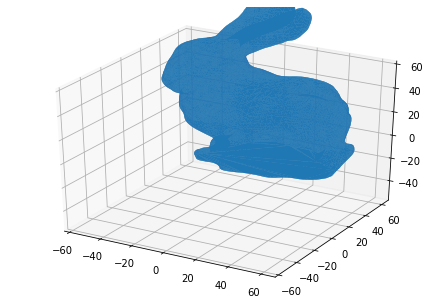

In [9]:
# plotting the mesh object
plot_mesh(bunny_mesh)

In [10]:
# mesh_len = len(your_mesh)
# for i in range(mesh_len):
#     print(your_mesh[i])
# # your_mesh[0]

In [12]:
# mesh_len

------------------------------------------------------------------------------------------------------------------------------

## Modifying Mesh objects

Concatenation is just appending the data arrays so it doesn’t make much difference really. It would come down to something like this:

- https://w.wol.ph/2015/01/28/readingwriting-3d-stl-files-numpy-stl/

In [ ]:
mesh_a = mesh.Mesh.from_file(...)
mesh_b = mesh.Mesh.from_file(...)
data = numpy.concatenate((mesh_a.data, mesh_b.data))
mesh_c = mesh.Mesh(data)

--------

In [28]:
# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

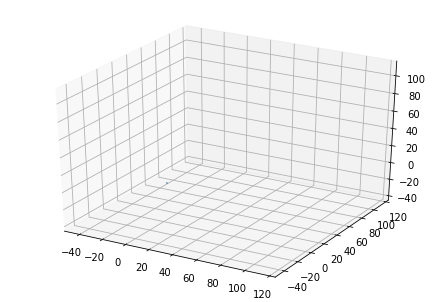

In [36]:
plot_mesh(meshes[2])

In [34]:
'''Changing the mesh object'''

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2

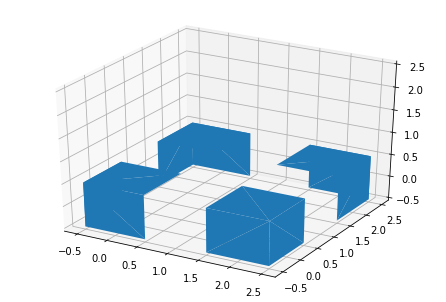

In [28]:
# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten('A') #must be one of 'C', 'F', 'A', or 'K'
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

-------

## Mesh - Volume, Cog, Inertia

In [17]:
import numpy as np
from stl import mesh

# Using an existing closed stl file:

volume, cog, inertia = your_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Volume                                  = 8000.0
Position of the center of gravity (COG) = [-45.  50.  10.]
Inertia matrix at expressed at the COG  = [533333.33333334     -0.             -0.        ]
                                          [    -0.  533334.4     -0. ]
                                          [    -0.      -0.  533334.4]
